In [1]:
import os
import glob
import time
from tqdm import tqdm
import ast

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns


In [2]:
cm = sns.light_palette("green", as_cmap=True)

In [3]:
def resultExtractor(val,feature):
    try:
        return ast.literal_eval(val)[feature]
    except:
        return np.nan

In [4]:
# CF_1 = pd.read_csv("../results/Collaborative filtering/CF gridsearch results.csv")
# CF_2 = pd.read_csv("../results/Collaborative filtering/CF baseline gridsearch results.csv")

# CF_3 = pd.read_csv("../results/Collaborative filtering/CF baseline als gridsearch results.csv")

In [13]:
# Results version
run = 3
path = f"../results/Collaborative filtering/run {run}/"

In [14]:
csv_files = glob.glob(os.path.join(path, "*.csv"))


In [7]:
df = pd.DataFrame()
for i in csv_files:
    print(i)
    df = pd.concat([pd.read_csv(i, index_col=0),df],axis=0).reset_index(drop=True)

../results/Collaborative filtering/run 3/CMF gridsearch results.csv
../results/Collaborative filtering/run 3/NNMF gridsearch results.csv
../results/Collaborative filtering/run 3/Wide CF gridsearch results.csv


In [8]:
# df = pd.concat([CF_1,CF_2,CF_3],axis=0)

#df = pd.read_csv(f"../results/Collaborative filtering/run {2}/Wide CF gridsearch results.csv")

In [9]:
#df.sort_values(by=["mean_test_fcp",'mean_test_mae','mean_test_mae'],ascending=True)

In [10]:
df["user_based"] = df.param_sim_options.apply(lambda x: resultExtractor(x,"user_based"))

df["similarity"] = df.param_sim_options.apply(lambda x: resultExtractor(x,'name'))

df["min_support"] = df.param_sim_options.apply(lambda x: resultExtractor(x,'min_support'))
df["shrinkage"] = df.param_sim_options.apply(lambda x: resultExtractor(x,'shrinkage'))
df["biased"] = df.param_sim_options.apply(lambda x: resultExtractor(x,'biased'))




In [39]:
print(testdata[testdata.model != "SVDpp"][['mean_test_rmse', 'std_test_rmse', 'mean_test_mae', 'std_test_mae',
       'mean_fit_time','mean_test_time',
        'param_embedding_dim', 'param_dropout', 'param_num_epochs',
       'param_lr', 'param_reg']].to_latex())

\begin{tabular}{lrrrrrrrrrrr}
\toprule
{} &  mean\_test\_rmse &  std\_test\_rmse &  mean\_test\_mae &  std\_test\_mae &  mean\_fit\_time &  mean\_test\_time &  param\_embedding\_dim &  param\_dropout &  param\_num\_epochs &  param\_lr &  param\_reg \\
\midrule
0   &        1.684995 &       0.007124 &       1.288885 &      0.007819 &      63.464645 &        7.229191 &                   10 &           0.00 &                30 &      0.01 &       0.01 \\
1   &        1.684559 &       0.007404 &       1.287500 &      0.008707 &      63.623875 &        7.233833 &                   10 &           0.00 &                30 &      0.01 &       0.05 \\
2   &        1.684168 &       0.007428 &       1.282251 &      0.006700 &      63.813377 &        6.640021 &                   10 &           0.00 &                30 &      0.01 &       0.10 \\
3   &        1.690994 &       0.014237 &       1.291381 &      0.021027 &      63.992500 &        5.708513 &                   10 &           0.00 &      

/var/folders/ck/bcrpxpw173z_zbvmzgxf02v80000gp/T/ipykernel_5014/2805058874.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(testdata[testdata.model != "SVDpp"][['mean_test_rmse', 'std_test_rmse', 'mean_test_mae', 'std_test_mae',


In [11]:
df["side_info"] = np.nan
try: 
    assert df.model.str.contains("cmf_").sum() >0
    for index, row in df.iterrows():
        if "cmf_" in row.model:
            #df.loc[index,["model","param_biased","side_info"]] = row.model.split("_",maxsplit=2)
            #print(df.loc[index,"model"])
            values = row.model.split("_",maxsplit=2)
            df.loc[index,"model"] = values[0]
            df.loc[index,"param_biased"] = values[1]
            df.loc[index,"side_info"] = values[2]
            
except:
    print("side info separated")


In [12]:
df.sort_values(by=["mean_test_fcp",'mean_test_rmse','mean_test_mae'],ascending=True)


df_rmse = df.sort_values(by=['mean_test_rmse'],ascending=True)
df_mae = df.sort_values(by=['mean_test_mae'],ascending=True)
df_fcp =df.sort_values(by=["mean_test_fcp"],ascending=True)

In [13]:
df = df.round(3)

In [14]:
for i in df.columns:
    if "odel" in i:
        print(i)

model


In [15]:
df[["model","mean_test_mae","similarity","user_based","min_support","shrinkage"]].model.unique()

array(['KNNBasic', 'KNNWithZScore', 'KNNWithMeans', 'SVD', 'KNNBaseline',
       'SVDpp', 'NNMF', 'cmf'], dtype=object)

In [16]:
name_map = {"KNNBaseline":"Baseline centered NB","KNNBasic":"Raw prediction NB",
                   "KNNWithMeans":"Mean centered NB","KNNWithZScore":"Z-score standardization NB",
                   "SVD":"Matrix Factorization","SVDpp":"Matrix Factorization with implicit ratings",
                   "cmf":"Collective Matrix Factorization", "NNMF": "Neural Network Matrix Factorization"}

In [17]:
# The best overall model
display(df_rmse.sort_values(by=['mean_test_rmse','rank_test_rmse'],ascending=True).loc[0,"model"])
display(df_mae.sort_values(by=['mean_test_mae','rank_test_mae'],ascending=True).loc[0,"model"])
display(df_fcp.sort_values(by=['mean_test_fcp','rank_test_fcp'],ascending=True).loc[0,"model"])

# At this moment baseline adjusted Matrix factorization is performs the best out of the models

'KNNBasic'

'KNNBasic'

'KNNBasic'

In [18]:
bestModelPef = df[["mean_test_rmse",
    "model"]].groupby("model").apply(lambda x: x.nsmallest(1,
                                                           "mean_test_rmse")).reset_index(drop=True).set_index("model").merge(
df[["mean_test_mae",
    "model"]].groupby("model").apply(lambda x: x.nsmallest(1,
                                                           "mean_test_mae")).reset_index(drop=True).set_index("model"),how="outer",left_index = True, right_index=True
    ).merge(df[["mean_test_fcp",
                "model"]].groupby("model").apply(lambda x: x.nlargest(1,
                                                                       "mean_test_fcp")).reset_index(drop=True).set_index("model"),how="outer",left_index = True, right_index=True)




In [19]:
#df[["mean_test_rmse","model"]].groupby("model").apply(lambda x: x.sort_values(by="mean_test_rmse",ascending=True))

print(bestModelPef.rename(name_map,axis=0).to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  mean\_test\_rmse &  mean\_test\_mae &  mean\_test\_fcp \\
model                                      &                 &                &                \\
\midrule
Baseline centered NB                       &           1.484 &          1.112 &          0.553 \\
Raw prediction NB                          &           1.684 &          1.289 &          0.809 \\
Mean centered NB                           &           1.661 &          1.245 &          0.619 \\
Z-score standardization NB                 &           1.661 &          1.245 &          0.619 \\
Neural Network Matrix Factorization        &           1.684 &          1.267 &          0.527 \\
Matrix Factorization                       &           1.477 &          1.104 &          0.590 \\
Matrix Factorization with implicit ratings &           1.482 &          1.108 &          0.540 \\
Collective Matrix Factorization            &           1.685 &          1.289 &          0.433 \\
\bottomrule
\e

/var/folders/ck/bcrpxpw173z_zbvmzgxf02v80000gp/T/ipykernel_8530/3446946240.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(bestModelPef.rename(name_map,axis=0).to_latex())


In [12]:
df

/Volumes/My Passport for Mac/thesis/games/Master-Thesis/venv/lib/python3.9/site-packages/IPython/lib/pretty.py:700: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
/Volumes/My Passport for Mac/thesis/games/Master-Thesis/venv/lib/python3.9/site-packages/IPython/core/formatters.py:345: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  return method()


,split0_test_rmse,split1_test_rmse,split2_test_rmse,mean_test_rmse,std_test_rmse,rank_test_rmse,split0_test_mae,split1_test_mae,split2_test_mae,mean_test_mae,...,param_include_all_X,param_random_state,param_verbose,param_produce_dicts,user_based,similarity,min_support,shrinkage,biased,side_info
0,1.690070,1.695164,1.705261,1.696832,0.006313,335,1.287883,1.295277,1.306879,1.296680,...,NaN,NaN,NaN,NaN,False,pearson,2.0,0.0,NaN,NaN
1,1.690070,1.695164,1.705261,1.696832,0.006313,337,1.287883,1.295277,1.306879,1.296680,...,NaN,NaN,NaN,NaN,False,pearson,2.0,5.0,NaN,NaN
2,1.690070,1.695164,1.705261,1.696832,0.006313,336,1.287883,1.295277,1.306879,1.296680,...,NaN,NaN,NaN,NaN,False,pearson,2.0,10.0,NaN,NaN
3,1.690070,1.695164,1.705261,1.696832,0.006313,339,1.287883,1.295277,1.306879,1.296680,...,NaN,NaN,NaN,NaN,False,pearson,2.0,20.0,NaN,NaN
4,1.690070,1.695164,1.705261,1.696832,0.006313,338,1.287883,1.295277,1.306879,1.296680,...,NaN,NaN,NaN,NaN,False,pearson,2.0,100.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6424,1.676557,1.684791,1.694416,1.685255,0.007298,22,1.279546,1.289335,1.299790,1.289557,...,True,100.0,False,True,NaN,NaN,NaN,NaN,NaN,rank
6425,3.743481,3.703286,3.643931,3.696899,0.040891,48,3.265040,3.217680,3.140896,3.207872,...,True,100.0,False,True,NaN,NaN,NaN,NaN,NaN,rank
6426,3.743481,3.703286,3.643931,3.696899,0.040891,49,3.265040,3.217680,3.140896,3.207872,...,True,100.0,False,True,NaN,NaN,NaN,NaN,NaN,rank
6427,3.743481,3.703286,3.643931,3.696899,0.040891,60,3.265040,3.217680,3.140896,3.207872,...,True,100.0,False,True,NaN,NaN,NaN,NaN,NaN,rank


In [29]:
def best_model_plot(data,ranking,performance):
    # Best feature space for each model
    idx = pd.IndexSlice
    df_by_model = data.groupby("model").apply(lambda x: x.sort_values(by=ranking,ascending=True))#[["mean_test_mae","similarity","user_based","min_support","shrinkage"]]#.iloc[idx[:,1]]
    best_by_model = pd.DataFrame()
    for i in df_by_model.index.levels[0]:
        best_by_model = pd.concat([best_by_model,df_by_model.loc[idx[i,:],:].iloc[[0],:]], axis=0)
    #display(.style.background_gradient(cmap=cm))
    
    best_by_model_display = best_by_model[[ranking,"similarity","user_based","min_support","shrinkage","param_biased","param_k", "param_n_factors","side_info","param_niter"]].sort_values(by=ranking)
    best_by_model_display.reset_index(inplace=True)
    best_by_model_display["model"] = best_by_model_display.model.map({"KNNBaseline":"Baseline centered","KNNBasic":"Raw prediction",
                   "KNNWithMeans":"Mean centered","KNNWithZScore":"Z-score standardization",
                   "SVD":"Matrix Factorization","SVDpp":"Matrix Factorization with implicit ratings",
                   "cmf":"Collective Matrix Factorization", "NNMF": "Neural Network Matrix Factorization"})
    best_by_model_display.set_index("model", inplace=True)
    
    print(best_by_model_display.drop(columns="level_1").to_latex())
    linechart = best_by_model[[i for i in best_by_model.columns if (("split" in i)&((performance in i)))]].reset_index().drop(columns="level_1").set_index("model").transpose()#.sort_index(axis=1)
    fig, ax = plt.subplots(figsize=(8, 6))
    BROWN = "#AD8C97"
    BROWN_DARKER = "#7d3a46"
    GREEN = "#2FC1D3"
    BLUE = "#076FA1"
    GREY = "#C7C9CB"
    GREY_DARKER = "#5C5B5D"
    RED = "#E3120B"
    YELLOW = "#FFFF00"
    
    model_names = {"KNNBaseline":"Baseline centered","KNNBasic":"Raw prediction",
                   "KNNWithMeans":"Mean centered","KNNWithZScore":"Z-score standardization",
                   "SVD":"Matrix Factorization","SVDpp":"Matrix Factorization with implicit ratings",
                   "cmf":"Collective Matrix Factorization","NNMF": "Neural Network Matrix Factorization"}
    # Add lines with dots
    # Note the zorder to have dots be on top of the lines
    for percentage, color in zip(linechart.columns, [BLUE, GREEN, BROWN,GREY,RED,YELLOW, BROWN_DARKER,GREY_DARKER]):
        ax.plot([1,2,3], linechart[percentage].values, color=color, lw=5, label=percentage)
        ax.scatter([1,2,3], linechart[percentage].values, fc=color, s=100, lw=1.5, ec="white", zorder=12)
        ax.xaxis.set_ticks([1,2,3])
        ax.text(x=3.02,y=linechart[percentage].values[-1],s=model_names[percentage],color=color)
    ax.set_xlabel("cross validation split")
    ax.set_ylabel(performance)

/var/folders/ck/bcrpxpw173z_zbvmzgxf02v80000gp/T/ipykernel_5014/642141425.py:18: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(best_by_model_display.drop(columns="level_1").to_latex())


\begin{tabular}{lrllrrlrrlr}
\toprule
{} &  mean\_test\_rmse &        similarity & user\_based &  min\_support &  shrinkage & param\_biased &  param\_k &  param\_n\_factors & side\_info &  param\_niter \\
model                                      &                 &                   &            &              &            &              &          &                  &           &              \\
\midrule
Matrix Factorization                       &        1.476773 &               NaN &        NaN &          NaN &        NaN &         True &      NaN &             10.0 &       NaN &          NaN \\
Matrix Factorization with implicit ratings &        1.482395 &               NaN &        NaN &          NaN &        NaN &          NaN &      NaN &             10.0 &       NaN &          NaN \\
Baseline centered                          &        1.483857 &  pearson\_baseline &       True &         18.0 &       10.0 &          NaN &    101.0 &              NaN &       NaN &          NaN 

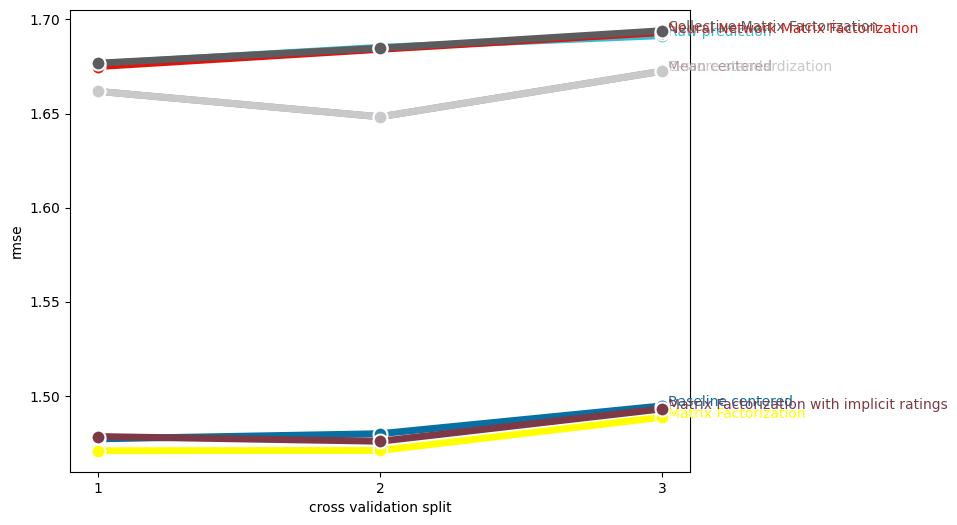

In [30]:
best_model_plot(df,"mean_test_rmse","rmse")

/var/folders/ck/bcrpxpw173z_zbvmzgxf02v80000gp/T/ipykernel_5014/642141425.py:18: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(best_by_model_display.drop(columns="level_1").to_latex())


\begin{tabular}{lrllrrlrrlr}
\toprule
{} &  mean\_test\_mae &        similarity & user\_based &  min\_support &  shrinkage & param\_biased &  param\_k &  param\_n\_factors & side\_info &  param\_niter \\
model                                      &                &                   &            &              &            &              &          &                  &           &              \\
\midrule
Matrix Factorization                       &       1.104422 &               NaN &        NaN &          NaN &        NaN &         True &      NaN &             10.0 &       NaN &          NaN \\
Matrix Factorization with implicit ratings &       1.108451 &               NaN &        NaN &          NaN &        NaN &          NaN &      NaN &             10.0 &       NaN &          NaN \\
Baseline centered                          &       1.111662 &  pearson\_baseline &       True &         18.0 &        5.0 &          NaN &    101.0 &              NaN &       NaN &          NaN \\
Me

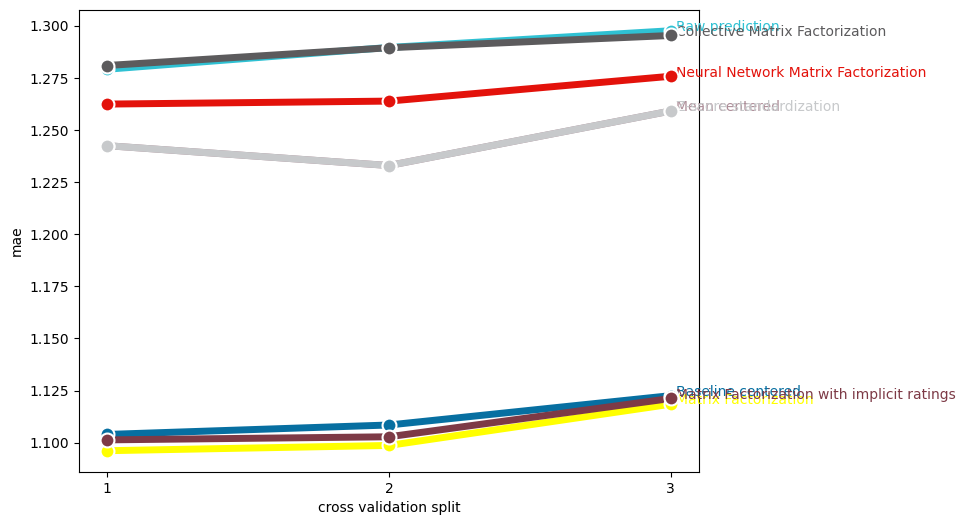

In [31]:
best_model_plot(df,"mean_test_mae","mae")

/var/folders/ck/bcrpxpw173z_zbvmzgxf02v80000gp/T/ipykernel_5014/642141425.py:18: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(best_by_model_display.drop(columns="level_1").to_latex())


\begin{tabular}{lrllrrlrrlr}
\toprule
{} &  mean\_test\_fcp &        similarity & user\_based &  min\_support &  shrinkage & param\_biased &  param\_k &  param\_n\_factors & side\_info &  param\_niter \\
model                                      &                &                   &            &              &            &              &          &                  &           &              \\
\midrule
Raw prediction                             &       0.125401 &  pearson\_baseline &      False &          8.0 &        5.0 &          NaN &    101.0 &              NaN &       NaN &          NaN \\
Matrix Factorization                       &       0.311762 &               NaN &        NaN &          NaN &        NaN &        False &      NaN &             10.0 &       NaN &          NaN \\
Neural Network Matrix Factorization        &       0.349326 &               NaN &        NaN &          NaN &        NaN &          NaN &      NaN &              NaN &       NaN &          NaN \\
Me

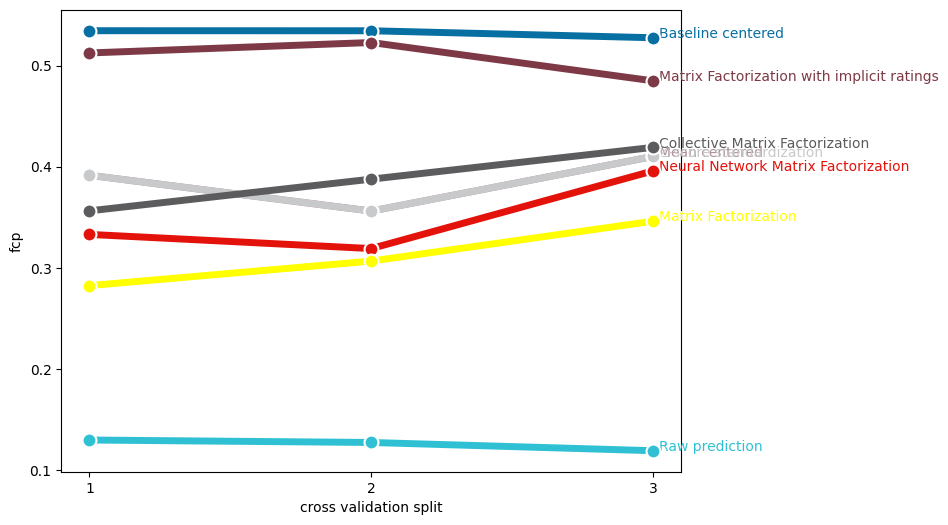

In [32]:
best_model_plot(df,"mean_test_fcp","fcp")

In [20]:
# We can see that pearson baseline similarity models the user-specific rating behaviour more accurately
# User-based model performs better than item-based models for this dataset

In [21]:
# def add_label(x, y, fontsize, ax):
#     PAD = 0.4
#     ax.annotate(
#         f"#{int(y)} in\n{str(int(x))[2:]}s", 
#         xy=(x, y - PAD), 
#         ha="center", 
#         va="bottom",
#         fontsize=fontsize,
#         fontname="Lato",
#         zorder=12
#     )

# def plot_country(country, data, annotate, ax):
    
#     for country_inner in data["model"].unique():
#         d = data[data["model"] == country_inner] 
#         x = [1,2,3]
#         y = d.iloc[:,2:].values[0]

#         if country_inner == country:
#             print(y)
#             ax.plot(x, y, color="#0b53c1", lw=2.4, zorder=10)
#             ax.scatter(x, y, fc="w", ec="#0b53c1", s=60, lw=2.4, zorder=12)
#             if annotate:
#                 add_label(x[0], y[0], 10, ax)
#                 add_label(x[-1], y[-1], 10, ax)
#         else:
#             ax.plot(x, y, color="#BFBFBF", lw=1.5)

#     ax.set_yticks([])
#     ax.set_xticks([1, 2, 3])
#     ax.set_xticklabels(
#         ["split 1", "split 2", "split 3"], 
#         fontsize=10,

#     )
#     ax.tick_params(bottom=False)
#     ax.set_frame_on(False)

#     ax.set_title(country, fontsize=14, fontweight=500)
    
#     return ax

# fig, axes = plt.subplots(3, 2, sharex=True, sharey=True, figsize=(14, 7.5))
# for idx, (ax, country) in enumerate(zip(axes.ravel(), df_by_model.index.levels[0])):
#     # Only annotate the first panel
#     annotate = idx == 0
#     plot_country(country, best_by_model[[i for i in best_by_model.columns if (("split" in i)&(("rmse" in i)))]].reset_index(), annotate, ax)

# # Since sharey=True, all vertical axis are inverted when we invert it in one subplot.
# ax.invert_yaxis()

In [20]:
df[df.model =="SVD"].groupby("param_n_factors").mean()[["mean_test_rmse","mean_test_mae"]].style.background_gradient(cmap=cm)

print(df[df.model =="SVD"].groupby("param_n_factors").mean()[["mean_test_rmse","mean_test_mae"]].to_latex())

/var/folders/ck/bcrpxpw173z_zbvmzgxf02v80000gp/T/ipykernel_8530/2157340827.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df[df.model =="SVD"].groupby("param_n_factors").mean()[["mean_test_rmse","mean_test_mae"]].style.background_gradient(cmap=cm)


\begin{tabular}{lrr}
\toprule
{} &  mean\_test\_rmse &  mean\_test\_mae \\
param\_n\_factors &                 &                \\
\midrule
10.0            &        2.664467 &       2.143967 \\
50.0            &        2.904547 &       2.392613 \\
100.0           &        2.986280 &       2.481240 \\
150.0           &        3.027033 &       2.526440 \\
200.0           &        3.052127 &       2.554460 \\
\bottomrule
\end{tabular}



/var/folders/ck/bcrpxpw173z_zbvmzgxf02v80000gp/T/ipykernel_8530/2157340827.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df[df.model =="SVD"].groupby("param_n_factors").mean()[["mean_test_rmse","mean_test_mae"]].to_latex())
/var/folders/ck/bcrpxpw173z_zbvmzgxf02v80000gp/T/ipykernel_8530/2157340827.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df[df.model =="SVD"].groupby("param_n_factors").mean()[["mean_test_rmse","mean_test_mae"]].to_latex())


In [22]:
# For CMF how do the different side informations fair
df[df.model =="cmf"].groupby("side_info").mean()[["mean_test_rmse","mean_test_mae"]].style.background_gradient(cmap=cm)


/var/folders/ck/bcrpxpw173z_zbvmzgxf02v80000gp/T/ipykernel_7121/3096317901.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df[df.model =="cmf"].groupby("side_info").mean()[["mean_test_rmse","mean_test_mae"]].style.background_gradient(cmap=cm)


,mean_test_rmse,mean_test_mae
side_info,,
cat,2.892308,2.432009
game_info,2.976140,2.468741
mechanics,2.892312,2.432077
rank,2.929672,2.446900
subcat,2.892307,2.432026
themes,2.892312,2.432077


In [38]:
df[df.model =="cmf"].groupby(["param_k"]).mean()[["mean_test_rmse","mean_test_mae"]].style.background_gradient(cmap=cm)


/var/folders/ck/bcrpxpw173z_zbvmzgxf02v80000gp/T/ipykernel_7121/3578973330.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df[df.model =="cmf"].groupby(["param_k"]).mean()[["mean_test_rmse","mean_test_mae"]].style.background_gradient(cmap=cm)


,mean_test_rmse,mean_test_mae
param_k,,
30.000000,2.911398,2.440366
50.000000,2.914528,2.441557
70.000000,2.911600,2.439992


In [23]:
# For CMF how do the different hyperparameters (K and Lambda) fair
df[df.model =="cmf"].groupby(["param_lambda_","param_k"]).mean()[["mean_test_rmse","mean_test_mae"]].style.background_gradient(cmap=cm)


/var/folders/ck/bcrpxpw173z_zbvmzgxf02v80000gp/T/ipykernel_7121/4179606340.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df[df.model =="cmf"].groupby(["param_lambda_","param_k"]).mean()[["mean_test_rmse","mean_test_mae"]].style.background_gradient(cmap=cm)


In [24]:
# 

In [25]:
# Comparison of KNN models for user-based/item-based
display(df.groupby(["model","user_based"]).mean()[['mean_test_rmse',"mean_test_mae"]].style.background_gradient(cmap=cm)
)


print((df.groupby(["model","user_based"]).mean()[['mean_test_rmse',"mean_test_mae"]]).to_latex())

/var/folders/ck/bcrpxpw173z_zbvmzgxf02v80000gp/T/ipykernel_7121/403640595.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  display(df.groupby(["model","user_based"]).mean()[['mean_test_rmse',"mean_test_mae"]].style.background_gradient(cmap=cm)


\begin{tabular}{llrr}
\toprule
              &       &  mean\_test\_rmse &  mean\_test\_mae \\
model & user\_based &                 &                \\
\midrule
KNNBaseline & False &        1.542637 &       1.158093 \\
              & True  &        1.543925 &       1.158895 \\
KNNBasic & False &        1.693891 &       1.295374 \\
              & True  &        1.689319 &       1.291670 \\
KNNWithMeans & False &        1.731901 &       1.297612 \\
              & True  &        1.665368 &       1.248762 \\
KNNWithZScore & False &        1.732722 &       1.297802 \\
              & True  &        1.665336 &       1.248511 \\
\bottomrule
\end{tabular}



/var/folders/ck/bcrpxpw173z_zbvmzgxf02v80000gp/T/ipykernel_7121/403640595.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print((df.groupby(["model","user_based"]).mean()[['mean_test_rmse',"mean_test_mae"]]).to_latex())
/var/folders/ck/bcrpxpw173z_zbvmzgxf02v80000gp/T/ipykernel_7121/403640595.py:6: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print((df.groupby(["model","user_based"]).mean()[['mean_test_rmse',"mean_test_mae"]]).to_latex())


In [26]:
# Comparion of KNN models for similarity measures
display(df.groupby(["model","similarity"]).mean()[['mean_test_rmse',"mean_test_mae"]].style.background_gradient(cmap=cm))

print(df.groupby(["model","similarity"]).mean()[['mean_test_rmse',"mean_test_mae"]].to_latex())

/var/folders/ck/bcrpxpw173z_zbvmzgxf02v80000gp/T/ipykernel_7121/3453579543.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  display(df.groupby(["model","similarity"]).mean()[['mean_test_rmse',"mean_test_mae"]].style.background_gradient(cmap=cm))


\begin{tabular}{llrr}
\toprule
              &                  &  mean\_test\_rmse &  mean\_test\_mae \\
model & similarity &                 &                \\
\midrule
KNNBaseline & MSD &        1.544305 &       1.159335 \\
              & cosine &        1.544336 &       1.159389 \\
              & pearson &        1.542783 &       1.158064 \\
              & pearson\_baseline &        1.541701 &       1.157189 \\
KNNBasic & MSD &        1.692697 &       1.294212 \\
              & cosine &        1.692957 &       1.294405 \\
              & pearson &        1.690516 &       1.292897 \\
              & pearson\_baseline &        1.690251 &       1.292573 \\
KNNWithMeans & MSD &        1.699447 &       1.274113 \\
              & cosine &        1.699458 &       1.274134 \\
              & pearson &        1.697864 &       1.272085 \\
              & pearson\_baseline &        1.697769 &       1.272416 \\
KNNWithZScore & MSD &        1.700241 &       1.274458 \\
              & cos

/var/folders/ck/bcrpxpw173z_zbvmzgxf02v80000gp/T/ipykernel_7121/3453579543.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby(["model","similarity"]).mean()[['mean_test_rmse',"mean_test_mae"]].to_latex())
/var/folders/ck/bcrpxpw173z_zbvmzgxf02v80000gp/T/ipykernel_7121/3453579543.py:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.groupby(["model","similarity"]).mean()[['mean_test_rmse',"mean_test_mae"]].to_latex())


In [27]:
# Comparion of KNN models for minimum support measures
df.groupby(["model","min_support"]).mean()[['mean_test_rmse',"mean_test_mae"]].style.background_gradient(cmap=cm)

/var/folders/ck/bcrpxpw173z_zbvmzgxf02v80000gp/T/ipykernel_7121/3343484583.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(["model","min_support"]).mean()[['mean_test_rmse',"mean_test_mae"]].style.background_gradient(cmap=cm)


In [28]:
# Comparion of KNN models for shrinkage measures
df[df.similarity=="pearson_baseline"].groupby(["model","shrinkage"]).mean()[['mean_test_rmse',"mean_test_mae"]].style.background_gradient(cmap=cm)

/var/folders/ck/bcrpxpw173z_zbvmzgxf02v80000gp/T/ipykernel_7121/3584394030.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df[df.similarity=="pearson_baseline"].groupby(["model","shrinkage"]).mean()[['mean_test_rmse',"mean_test_mae"]].style.background_gradient(cmap=cm)


In [29]:
# SVD for bias
display(df.groupby(["model","param_biased"]).mean()[['mean_test_rmse',"mean_test_mae"]].style.background_gradient(cmap=cm))

print(df.groupby(["model","param_biased"]).mean()[['mean_test_rmse',"mean_test_mae"]].to_latex())

/var/folders/ck/bcrpxpw173z_zbvmzgxf02v80000gp/T/ipykernel_7121/1449727571.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  display(df.groupby(["model","param_biased"]).mean()[['mean_test_rmse',"mean_test_mae"]].style.background_gradient(cmap=cm))


\begin{tabular}{llrr}
\toprule
    &         &  mean\_test\_rmse &  mean\_test\_mae \\
model & param\_biased &                 &                \\
\midrule
SVD & False &        4.349243 &       3.713169 \\
    & True &        1.504521 &       1.126313 \\
cmf & bias &        3.133940 &       2.632562 \\
    & nonbias &        2.691077 &       2.248715 \\
\bottomrule
\end{tabular}



/var/folders/ck/bcrpxpw173z_zbvmzgxf02v80000gp/T/ipykernel_7121/1449727571.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby(["model","param_biased"]).mean()[['mean_test_rmse',"mean_test_mae"]].to_latex())
/var/folders/ck/bcrpxpw173z_zbvmzgxf02v80000gp/T/ipykernel_7121/1449727571.py:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.groupby(["model","param_biased"]).mean()[['mean_test_rmse',"mean_test_mae"]].to_latex())


A natural question that arises is why this formulation should perform better than un- constrained matrix factorization. The addition of constraints on the last two columns of the factor matrices should only reduce the global solution quality, because one is now optimizing over a smaller space of solutions. However, in many cases, adding such constraints biases the solution while reducing overfitting. In other words, the addition of such intuitive con- straints can often improve the generalizability of the learning algorithm to unseen entries, even though the error over the specified entries may be higher. This is particularly helpful when the number of observed ratings for a user or for an item is small [473]. Bias variables add a component to the ratings that are global to either the users or the items. Such global properties are useful when limited data is available. As a specific example, consider the case in which a user has provided ratings for only a small number (1 or 2) items. In such cases, many recommendation algorithms, such as neighborhood-based methods, will not give reli- able predictions for the user. On the other hand, the (non-personalized) predictions of the item bias variables will be able to give reasonable predictions. After all, if a particular movie is a box-office hit on a global basis, then the relevant user is also more likely to appreciate it. The bias variables will also reflect this fact and incorporate it into the learning algorithm.
In fact, it has been shown [73, 310, 312] that using only the bias variables (i.e., k = 0) can often provide reasonably good rating predictions.

In [30]:
# Patterns of the best model
df[df.model == "KNNBaseline"].groupby(["similarity","min_support"]).mean()[['mean_test_rmse',"mean_test_mae"]].style.background_gradient(cmap=cm)

/var/folders/ck/bcrpxpw173z_zbvmzgxf02v80000gp/T/ipykernel_7121/1400695619.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df[df.model == "KNNBaseline"].groupby(["similarity","min_support"]).mean()[['mean_test_rmse',"mean_test_mae"]].style.background_gradient(cmap=cm)


In [31]:
plt.figure()
plt.plot(theta_values, Squared_error)
plt.xlabel('Theta Values')
plt.ylabel('Squared Error')
plt.show()

NameError: name 'theta_values' is not defined

<Figure size 640x480 with 0 Axes>